# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

577

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


#Initialize variables and empty lists for the dataframe later
record_count = 0
cities2 = [] # may not be same length as cities after queries
cloudinesses = [] #Fun Fact, the plural of cloudiness sounds like a stutter
countries = []
unix_times = [] #aka nerd time
humidities= []
latis = []
longs = []
max_temps = []
wind_speeds = []

# Loop through cities and query weather data if available
print("Beginning Data Retrieval")    
print("-----------------------------")
for city in cities:
    try:
        record_count += 1
        response = requests.get(query_url + city).json()
        print(f"Processing Record {record_count} | {city}")
        # Appending weather data to lists
        cities2.append(response["name"])
        cloudinesses.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        unix_times.append(response["dt"])
        humidities.append(response["main"]["humidity"])
        latis.append(response["coord"]["lat"])
        longs.append(response["coord"]["lon"])
        max_temps.append(response["main"]["temp_max"])
        wind_speeds.append(response["wind"]["speed"])
    except:
        print(f"City not found. Skipping {city}...")
        pass
print("-----------------------------")
print("Data Retrieval Complete")    
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | atuona
Processing Record 2 | nikolskoye
Processing Record 3 | cayenne
Processing Record 4 | taolanaro
City not found. Skipping taolanaro...
Processing Record 5 | mount isa
Processing Record 6 | cape town
Processing Record 7 | rikitea
Processing Record 8 | bambous virieux
Processing Record 9 | provideniya
Processing Record 10 | vaini
Processing Record 11 | nizhneudinsk
Processing Record 12 | carnarvon
Processing Record 13 | faanui
Processing Record 14 | hibbing
Processing Record 15 | guadalupe victoria
Processing Record 16 | tarhunah
City not found. Skipping tarhunah...
Processing Record 17 | illoqqortoormiut
City not found. Skipping illoqqortoormiut...
Processing Record 18 | jamestown
Processing Record 19 | mataura
Processing Record 20 | kloulklubed
Processing Record 21 | mahebourg
Processing Record 22 | vieste
Processing Record 23 | loanda
Processing Record 24 | lompoc
Processing Record 25 | saldanha
Processi

Processing Record 224 | lavrentiya
Processing Record 225 | angoram
Processing Record 226 | sungairaya
Processing Record 227 | tevaitoa
Processing Record 228 | bengkulu
City not found. Skipping bengkulu...
Processing Record 229 | laguna de perlas
Processing Record 230 | katangli
Processing Record 231 | sentyabrskiy
City not found. Skipping sentyabrskiy...
Processing Record 232 | sabha
Processing Record 233 | cabo san lucas
Processing Record 234 | nhamunda
Processing Record 235 | kidal
Processing Record 236 | zhuhai
Processing Record 237 | narsaq
Processing Record 238 | loralai
Processing Record 239 | saskylakh
Processing Record 240 | sangar
Processing Record 241 | kahului
Processing Record 242 | ilulissat
Processing Record 243 | castro
Processing Record 244 | khani
Processing Record 245 | nouakchott
Processing Record 246 | sitka
Processing Record 247 | bargal
City not found. Skipping bargal...
Processing Record 248 | valdivia
Processing Record 249 | talnakh
Processing Record 250 | const

Processing Record 443 | beyneu
Processing Record 444 | zhangye
Processing Record 445 | safaqis
City not found. Skipping safaqis...
Processing Record 446 | manyana
Processing Record 447 | sorland
Processing Record 448 | moose factory
Processing Record 449 | ormara
Processing Record 450 | anadyr
Processing Record 451 | hay river
Processing Record 452 | qafsah
City not found. Skipping qafsah...
Processing Record 453 | hope
Processing Record 454 | lipari
Processing Record 455 | kadom
Processing Record 456 | limulunga
Processing Record 457 | balkhash
Processing Record 458 | damietta
Processing Record 459 | rajanpur
Processing Record 460 | tongren
Processing Record 461 | mazagao
Processing Record 462 | oyem
Processing Record 463 | makakilo city
Processing Record 464 | boa vista
Processing Record 465 | utiroa
City not found. Skipping utiroa...
Processing Record 466 | matongo
Processing Record 467 | garoua
Processing Record 468 | hirara
Processing Record 469 | marsh harbour
Processing Record 4

In [3]:
#Provided expected sample output

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {"City" : cities2,
                "Cloudiness" : cloudinesses,
                "Country" : countries,
                "Date" :unix_times,
                "Humidity" : humidities,
                "Lat" : latis,
                "Lng" : longs,
                "Max Temp": max_temps,
                "Wind Speed" : wind_speeds}
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv(r"weather_df.csv", index=False)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 9 columns):
City          517 non-null object
Cloudiness    517 non-null int64
Country       517 non-null object
Date          517 non-null int64
Humidity      517 non-null int64
Lat           517 non-null float64
Lng           517 non-null float64
Max Temp      517 non-null float64
Wind Speed    517 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 36.4+ KB


In [4]:
#Provided expected output

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [5]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Atuona,3,PF,1573352373,78,-9.80,-139.03,79.92,13.06
1,Nikolskoye,90,RU,1573352373,93,59.70,30.79,41.00,2.24
2,Cayenne,40,GF,1573352373,88,4.94,-52.33,80.60,3.36
3,Mount Isa,43,AU,1573352373,8,-20.73,139.49,87.80,6.93
4,Cape Town,59,ZA,1573352126,77,-33.93,18.42,64.00,5.82


In [5]:
#Provided expected output

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

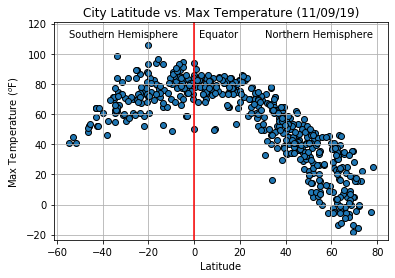

In [6]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolors="black")
plt.ylim()
plt.grid()
day = time.strftime("%m/%d/%y", time.localtime(weather_df["Date"].max()))
plt.title(f"City Latitude vs. Max Temperature ({day})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature ($^o$F)")
plt.axvline(x=0, c="red")
top = weather_df["Max Temp"].max() + 5
bottom = weather_df["Max Temp"].min()
plt.ylim((bottom-5, top+10))
left = weather_df["Lat"].min()
right = weather_df["Lat"].max()
plt.annotate("Equator", (2, top))
plt.annotate("Northern Hemisphere", (right, top), ha="right")
plt.annotate("Southern Hemisphere", (left, top))
#Save to file
plt.savefig("images/Lat_vs_temp.png")
#Show
plt.show()

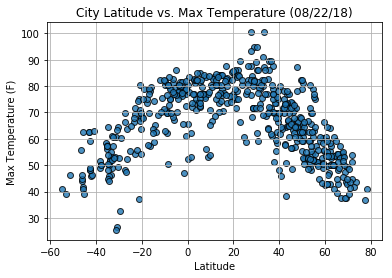

In [6]:
#Provided expected output

#### Latitude vs. Humidity Plot

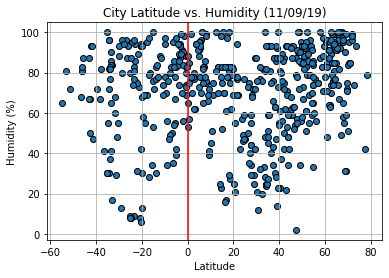

In [7]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors="black")
plt.grid()
day = time.strftime("%m/%d/%y", time.localtime(weather_df["Date"].max()))
plt.title(f"City Latitude vs. Humidity ({day})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.axvline(x=0, c="red")
#Save to file
plt.savefig("images/Lat_vs_humidity.png")
#Show
plt.show()

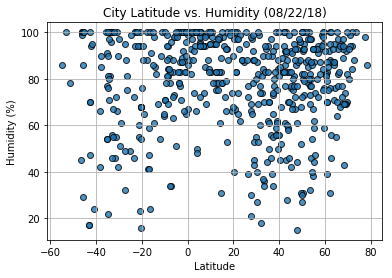

In [7]:
#Provided expected output

#### Latitude vs. Cloudiness Plot

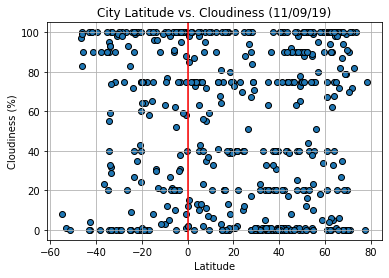

In [8]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolors="black")
plt.grid()
day = time.strftime("%m/%d/%y", time.localtime(weather_df["Date"].max()))
plt.title(f"City Latitude vs. Cloudiness ({day})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.axvline(x=0, c="red")
#Save to file
plt.savefig("images/Lat_vs_cloudiness.png")
#Show
plt.show()

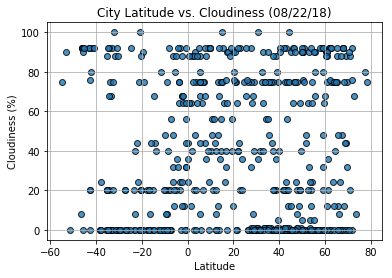

In [8]:
#Provided expected output

#### Latitude vs. Wind Speed Plot

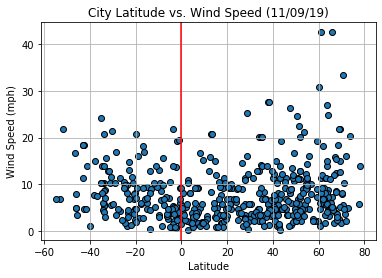

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolors="black")
plt.grid()
day = time.strftime("%m/%d/%y", time.localtime(weather_df["Date"].max()))
plt.title(f"City Latitude vs. Wind Speed ({day})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.axvline(x=0, c="red")
#Save to file
plt.savefig("images/Lat_vs_wind.png")
#Show
plt.show()

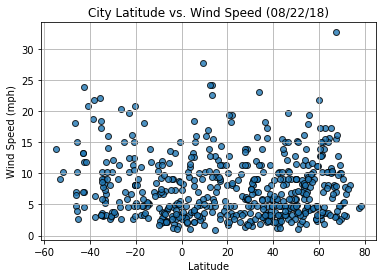

In [9]:
#Provided expected output

## Observable Trends
***
* The temperature varies with somewhat of a bell shape, with the highest temperatures near the equator, and the lowest toward the poles...as expected.
***
* The humidity versus latitude appears to have two clusters, or "humps" of values. The lower humidity values are progressivley absent as we near the equator. This may have something to do with the equator being some sort of boundary layer between the northern and southern hemispheres, affecting the humidity levels.
***
* The cloudiness versus latitude appears discretized. This is interesting because it suggests to me that the way in which 'cloudiness' is measured is in discrete values, or bins, as opposed to a continnuum.
***